<a href="https://colab.research.google.com/github/hmckinn4/xGAgainstStats/blob/main/xGAgainstStats_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

--- Analyzing data for sheet: 2024.min.20.games ---

--- Analyzing data for sheet: 2024.min.400.minutes ---

--- Analyzing data for sheet: All.Season.min.100.games ---


<ipython-input-7-0fc3c4c0d87b>:86: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(figsize=(8, 6))



--- Correlation Results by Sheet ---


Column 1,Column 2,Correlation
Rating,Games,-0.2548
Rating,TotalShotsAgainst,-0.4349
Rating,TOITotalSeconds,-0.2540
Rating,TOIEVSeconds,-0.1812
Rating,Min/Game,-0.1846
Games,TotalShotsAgainst,0.8256
TOITotalSeconds,TotalShotsAgainst,0.9597


--------------------------------------------------


Column 1,Column 2,Correlation
Rating,Games,-0.1801
Rating,TotalShotsAgainst,-0.4650
Rating,TOITotalSeconds,-0.2560
Rating,TOIEVSeconds,-0.1736
Rating,Min/Game,-0.2168
Games,TotalShotsAgainst,0.6986
TOITotalSeconds,TotalShotsAgainst,0.9417


--------------------------------------------------


Column 1,Column 2,Correlation
Rating,Games,-0.0398
Rating,TotalShotsAgainst,-0.2014
Rating,TOITotalSeconds,-0.0518
Rating,TOIEVSeconds,-0.0214
Rating,Min/Game,-0.0225
Games,TotalShotsAgainst,0.9111
TOITotalSeconds,TotalShotsAgainst,0.9779


--------------------------------------------------

--- Scatter Plots with Trend Lines ---


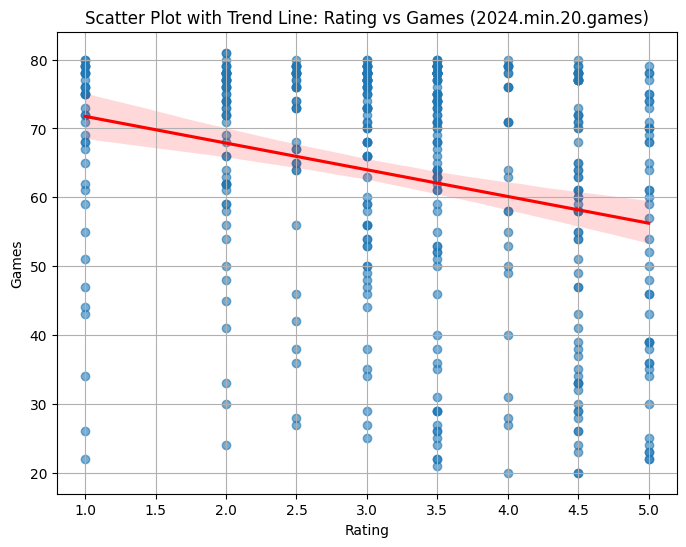

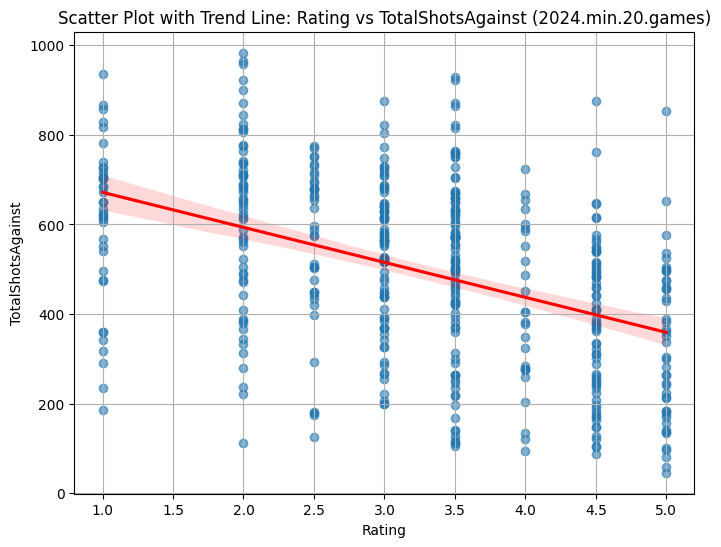

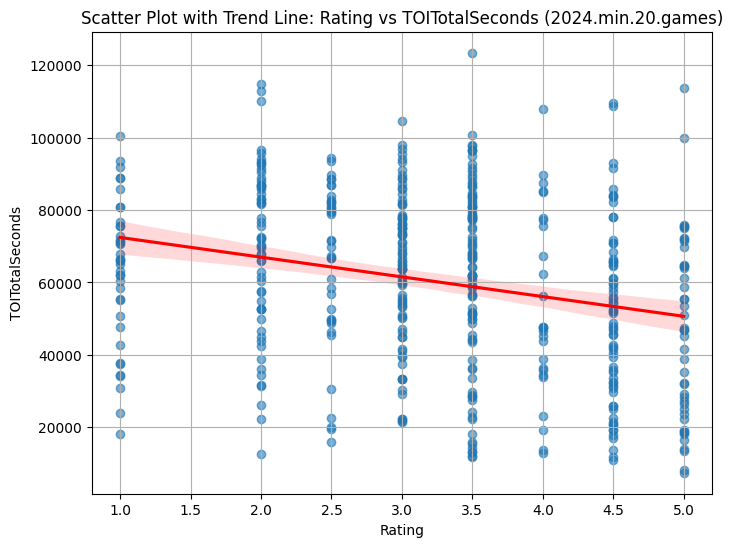

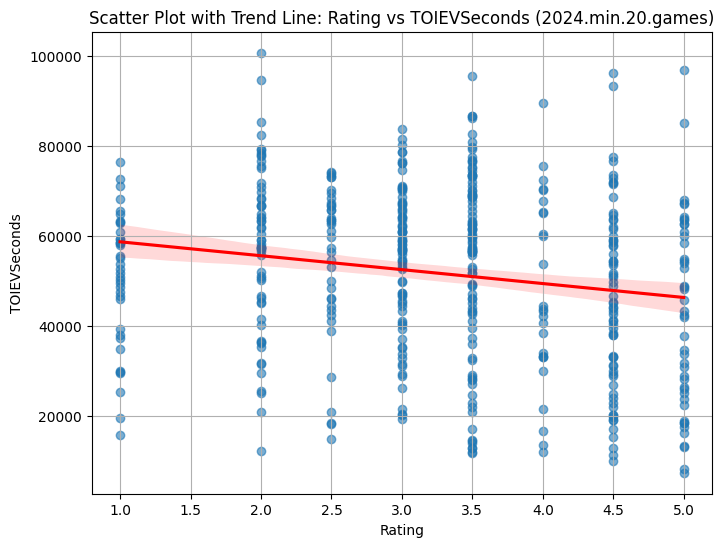

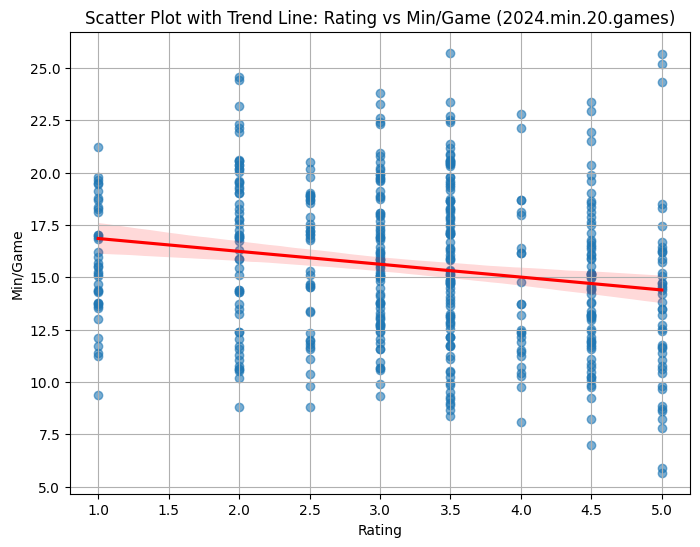

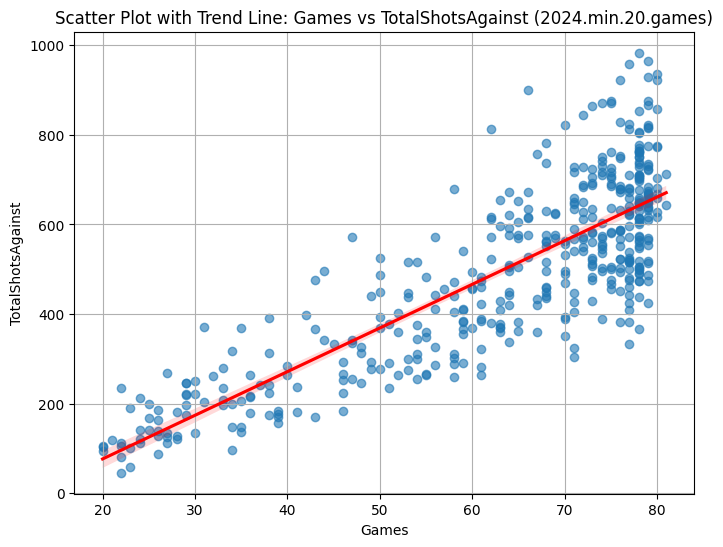

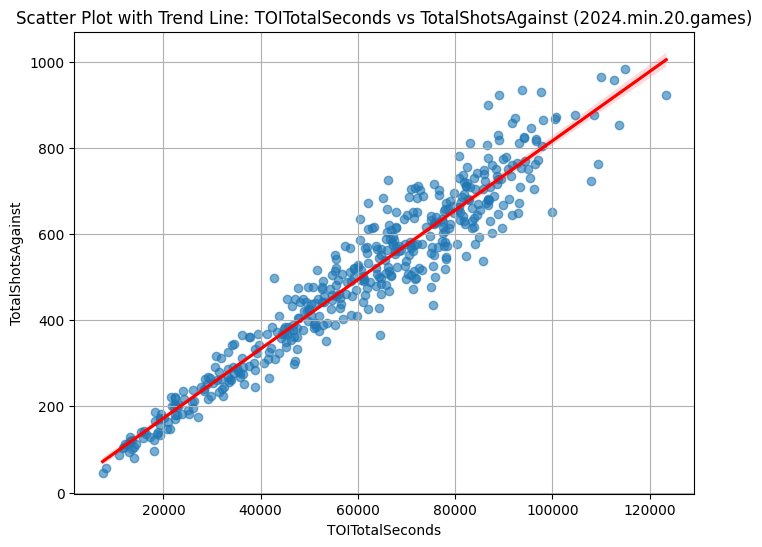

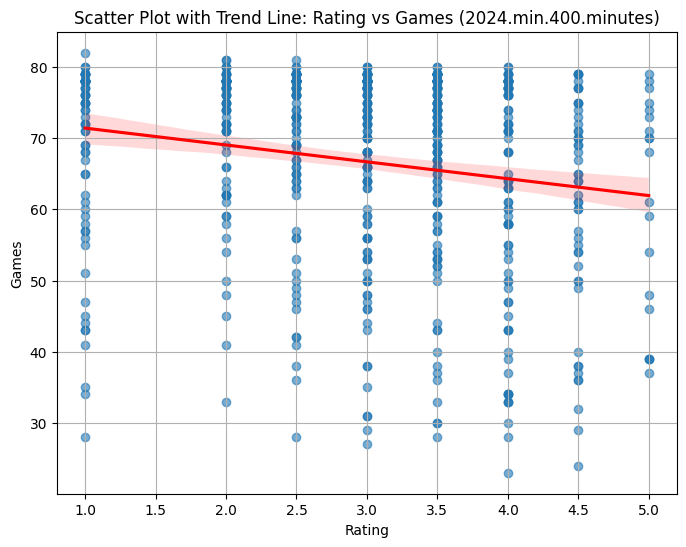

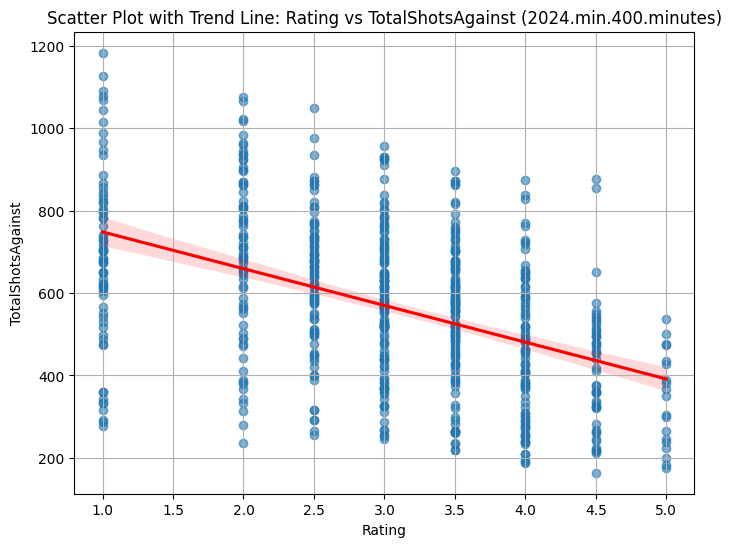

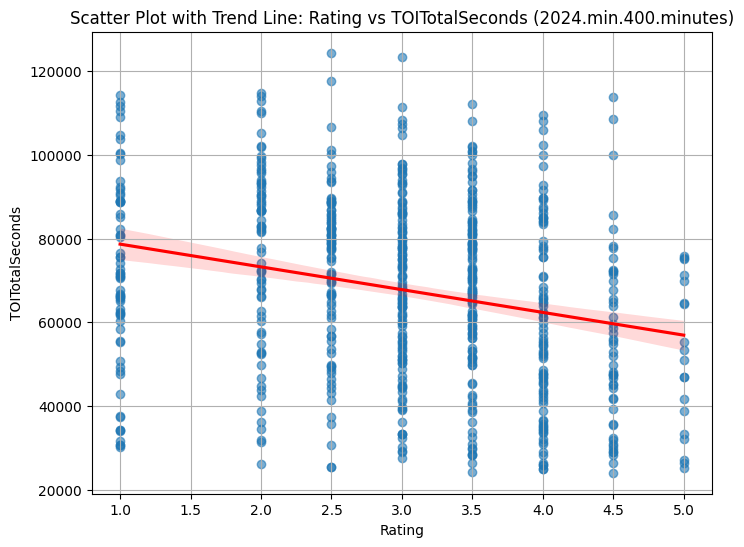

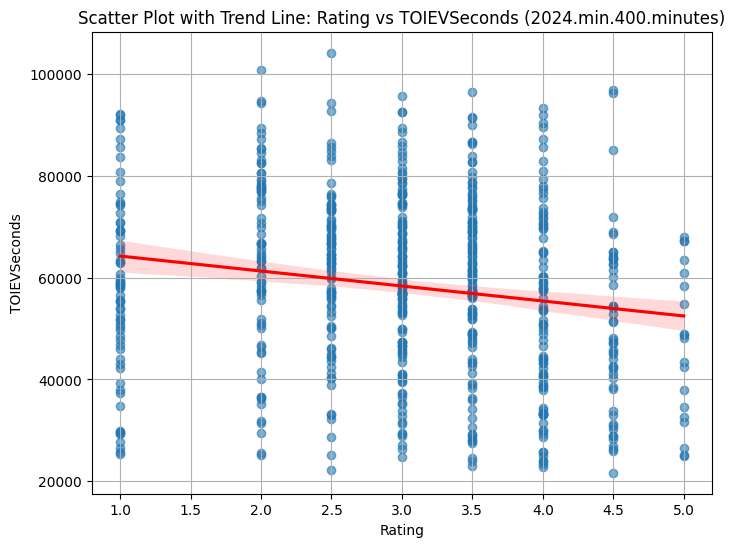

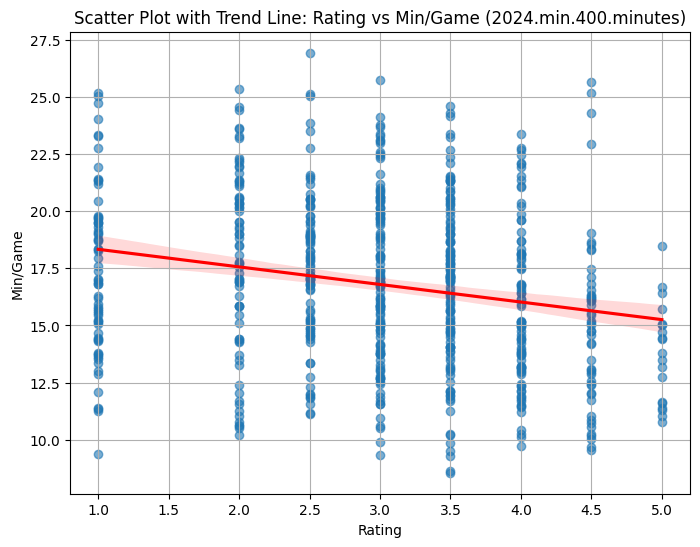

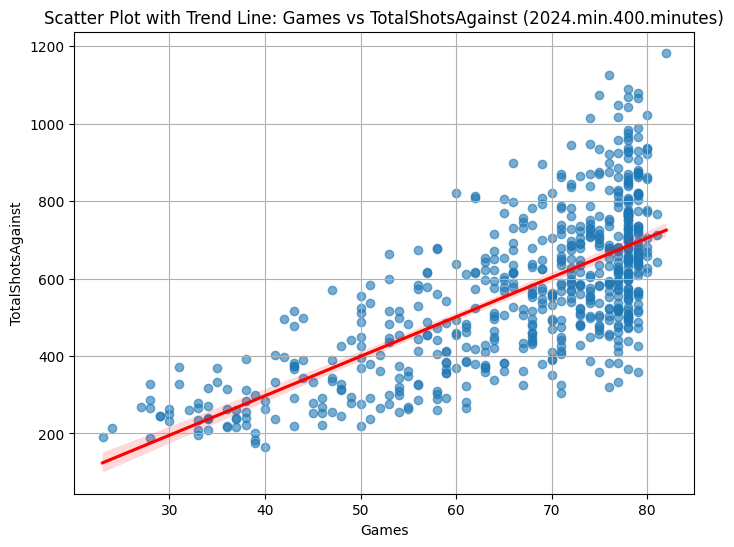

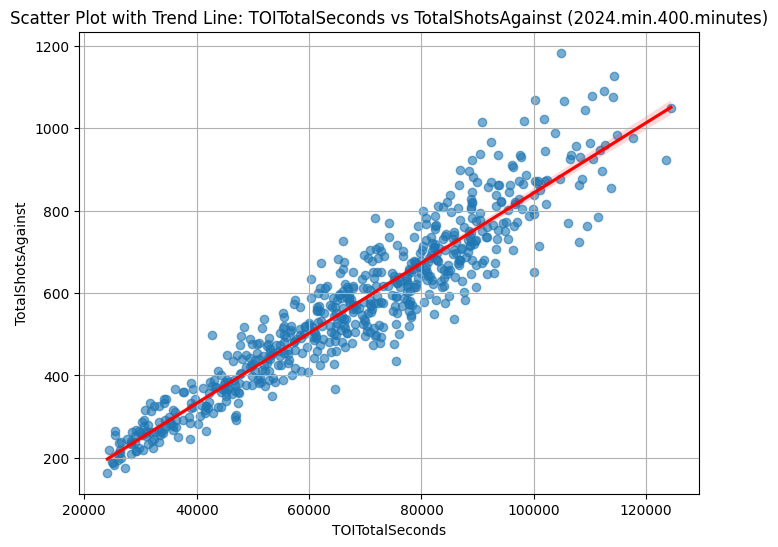

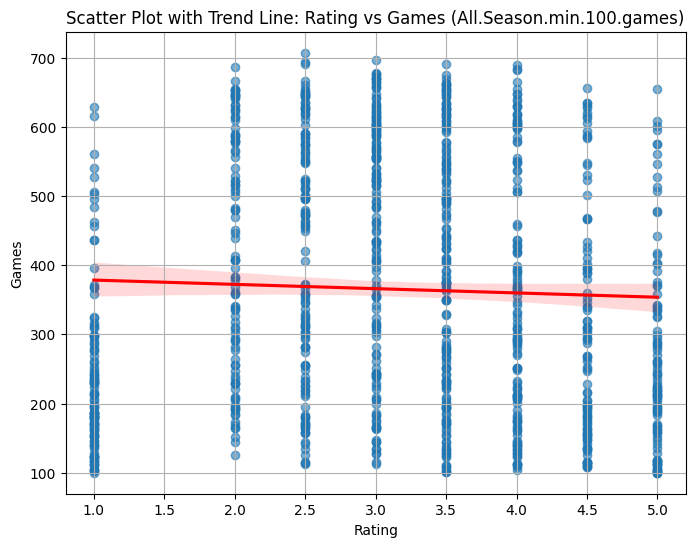

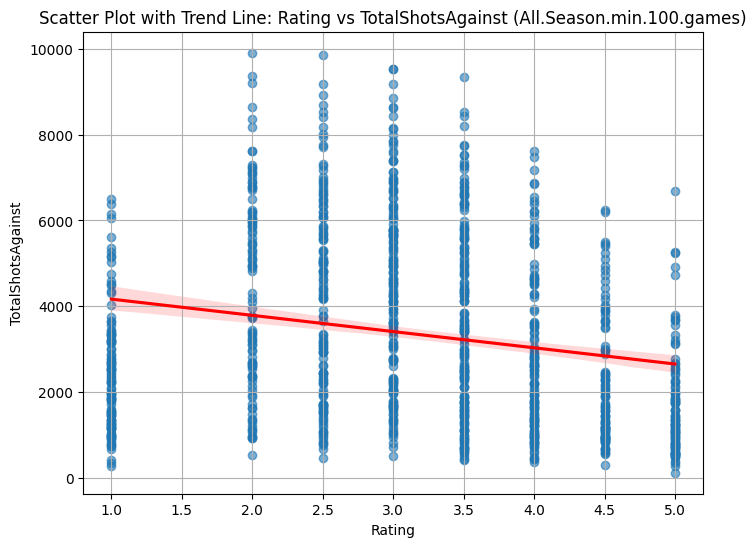

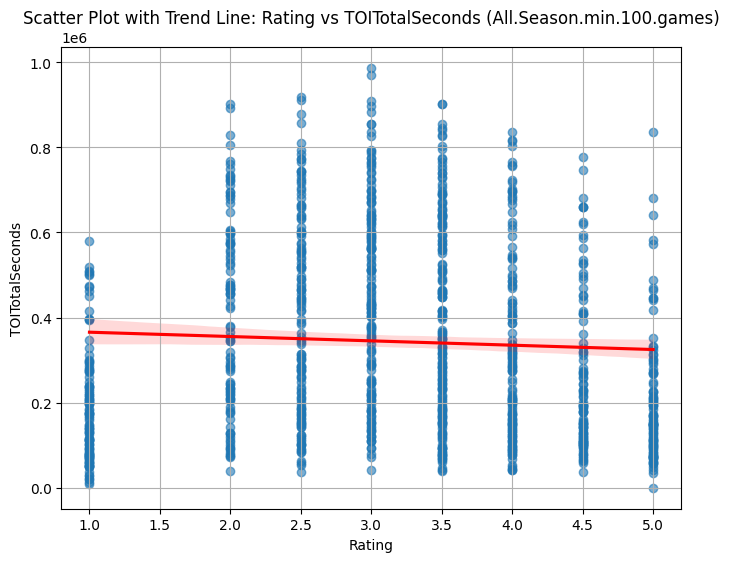

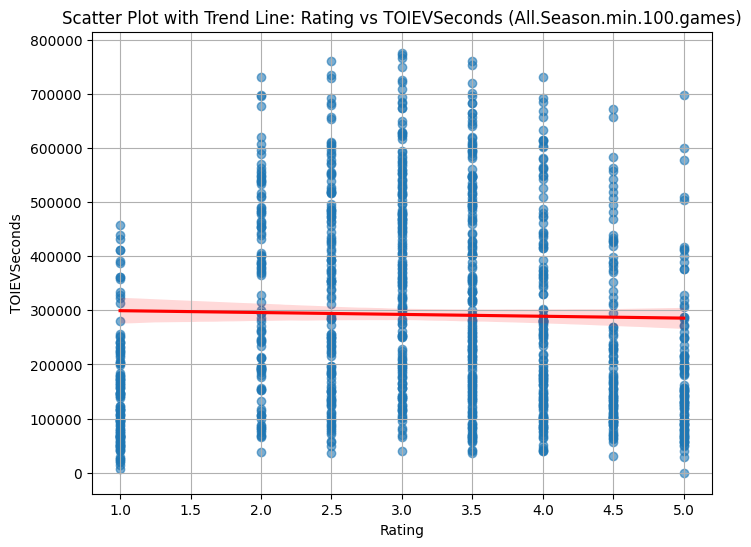

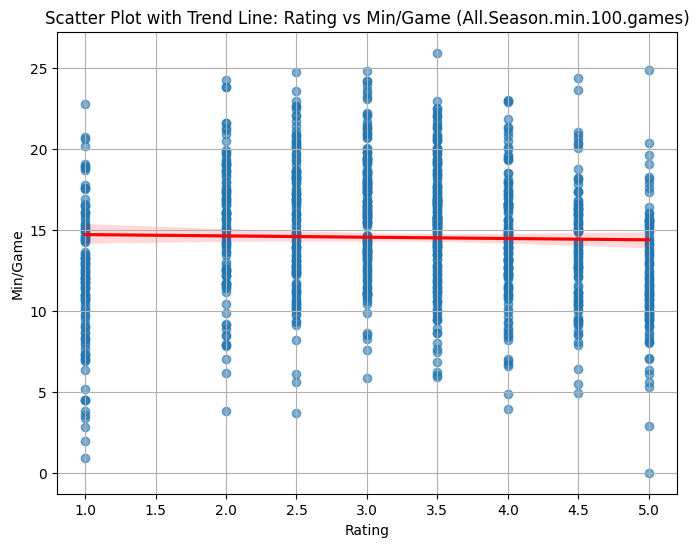

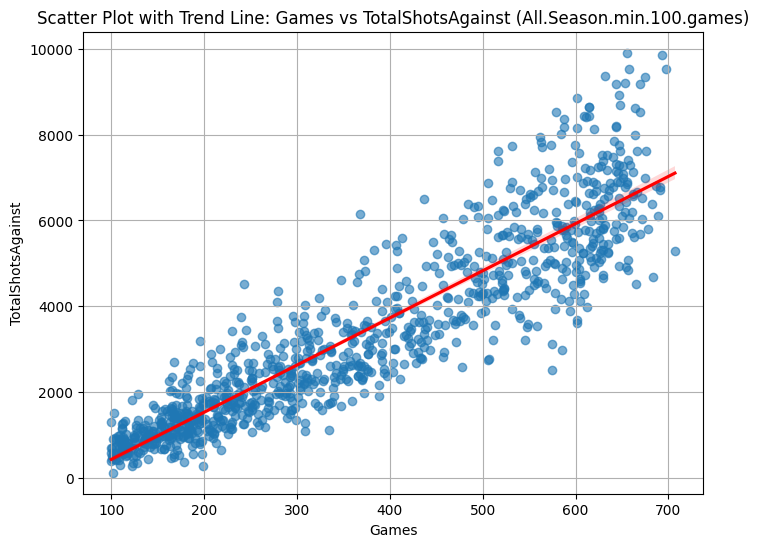

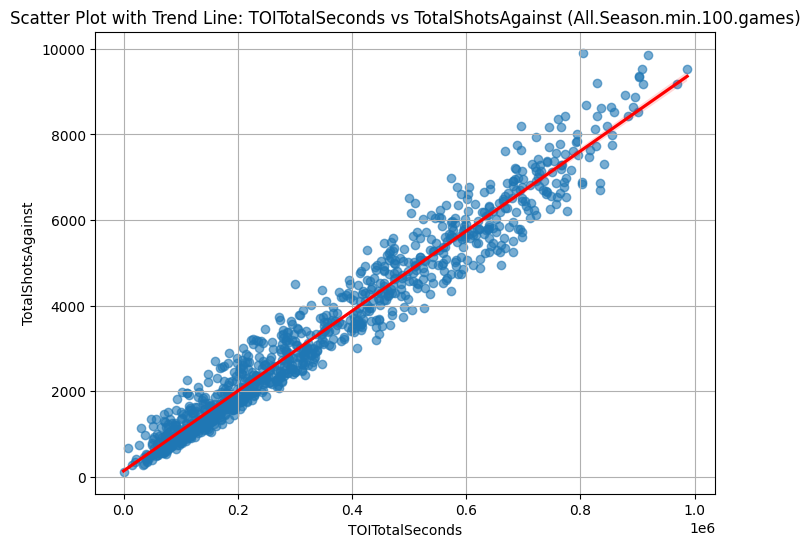


--- End of Analysis ---


In [7]:
# 1) Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# 2) Import pandas, gspread for Google Sheets, and seaborn for plotting
import pandas as pd
from google.colab import auth
from google.auth import default
import gspread
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML

# 3) Authenticate Google Sheets
auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)

# 4) Specify the Google Sheet name
sheet_name = "xGAgainstStats"

# 5) Open the Google Sheet
try:
    spreadsheet = gc.open(sheet_name)
except gspread.SpreadsheetNotFound:
    print(f"Error: Spreadsheet '{sheet_name}' not found. Please ensure the name is correct and it's in your Google Drive.")
    exit()

# 6) Define the sheets and the correlations to run
sheets_and_correlations = {
    "2024.min.20.games": [
        ("Rating", "Games"),
        ("Rating", "TotalShotsAgainst"),
        ("Rating", "TOITotalSeconds"),
        ("Rating", "TOIEVSeconds"),
        ("Rating", "Min/Game"),
        ("Games", "TotalShotsAgainst"),
        ("TOITotalSeconds", "TotalShotsAgainst"),
    ],
    "2024.min.400.minutes": [
        ("Rating", "Games"),
        ("Rating", "TotalShotsAgainst"),
        ("Rating", "TOITotalSeconds"),
        ("Rating", "TOIEVSeconds"),
        ("Rating", "Min/Game"),
        ("Games", "TotalShotsAgainst"),
        ("TOITotalSeconds", "TotalShotsAgainst"),
    ],
    "All.Season.min.100.games": [
        ("Rating", "Games"),
        ("Rating", "TotalShotsAgainst"),
        ("Rating", "TOITotalSeconds"),
        ("Rating", "TOIEVSeconds"),
        ("Rating", "Min/Game"),
        ("Games", "TotalShotsAgainst"),
        ("TOITotalSeconds", "TotalShotsAgainst"),
    ],
}

# Store correlation results grouped by sheet
correlation_results_by_sheet = {}
all_figures = []

# 7) Loop through each sheet and calculate correlations and store graphs
for sheet_title, correlations in sheets_and_correlations.items():
    try:
        worksheet = spreadsheet.worksheet(sheet_title)
        data = worksheet.get_all_values()
        headers = data[0]
        df = pd.DataFrame(data[1:], columns=headers)
        correlation_results_by_sheet[sheet_title] = []

        print(f"\n--- Analyzing data for sheet: {sheet_title} ---")

        for col1, col2 in correlations:
            if col1 in df.columns and col2 in df.columns:
                # Convert columns to numeric, coercing errors to NaN
                df[col1] = pd.to_numeric(df[col1], errors='coerce')
                df[col2] = pd.to_numeric(df[col2], errors='coerce')

                # Calculate Pearson correlation
                correlation = df[col1].corr(df[col2], method='pearson')
                correlation_results_by_sheet[sheet_title].append([col1, col2, f"{correlation:.4f}"])

                # Create a scatter plot with a trend line using seaborn
                fig, ax = plt.subplots(figsize=(8, 6))
                sns.regplot(x=df[col1], y=df[col2], scatter_kws={'alpha': 0.6}, line_kws={'color': 'red'}, order=1)
                ax.set_title(f"Scatter Plot with Trend Line: {col1} vs {col2} ({sheet_title})")
                ax.set_xlabel(col1)
                ax.set_ylabel(col2)
                ax.grid(True)
                all_figures.append(fig)

            else:
                print(f"Warning: One or both columns ('{col1}', '{col2}') not found in sheet '{sheet_title}'. Skipping correlation and graph.")

    except gspread.WorksheetNotFound:
        print(f"Error: Sheet '{sheet_title}' not found in the spreadsheet.")
    except Exception as e:
        print(f"An error occurred while processing sheet '{sheet_title}': {e}")

# 8) Display correlation results in separate tables with titles
print("\n--- Correlation Results by Sheet ---")
for sheet, results in correlation_results_by_sheet.items():
    df_corr_table = pd.DataFrame(results, columns=["Column 1", "Column 2", "Correlation"])
    display(HTML(f"<h3>Sheet: {sheet}</h3>"))
    display(HTML(df_corr_table.to_html(index=False)))
    print("-" * 50)  # Add a separator between tables

# 9) Display all the figures
print("\n--- Scatter Plots with Trend Lines ---")
for fig in all_figures:
    plt.show(fig)

print("\n--- End of Analysis ---")